In [1]:
#Libraries
import numpy as np
from numpy import *
import pandas as pd
from PIL import Image
import cv2 as cv2
import os
import matplotlib.pyplot as plt
import sys

In [2]:
#Plotting one Image by its ImageVector
def showImage(imageVector):
    data = np.array(imageVector)
    data2d = data.reshape(-1,256)
    img = Image.fromarray(data2d)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [3]:
# Visualization
def plot_gallery(images, rows, cols):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1 )
        plt.imshow(images[i].reshape((-1,256)), cmap=plt.cm.gray)

In [4]:
# Visualization
def plot_gallery(images, rows, cols):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1 )
        plt.imshow(images[i].reshape((-1,256)), cmap=plt.cm.gray)

In [5]:
def reconstructing_faces(k,meanImg,testing,V):
    weights=np.dot(testing, V.T)
    reconstruction = meanImg + np.dot(weights[:,0:k], V[0:k,:])
    return reconstruction

In [6]:
import tkinter as tk
from tkinter import filedialog 
def get_path():
    root = tk.Tk()
    dirname = filedialog.askdirectory(parent=root,initialdir="/",title='Please select a directory')
    root.withdraw()
    return dirname

def load_images():
    dir_name = get_path()
    data_one_dimesion = []
    for filename in os.listdir(dir_name):
        img = cv2.imread(os.path.join(dir_name,filename))
        if img is not None:
            arr = np.array(Image.fromarray(img).convert('L'))
            arr1 = arr.flatten()
            data_one_dimesion.append(arr1)
            data = np.array(data_one_dimesion)
    return data

In [7]:
#Loading Images from Faces Folder
faces = load_images()
print("Face Data Dimensions :",faces.shape)
print("Data : \n" , faces)

Face Data Dimensions : (177, 65536)
Data : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
#Training & Tesing Split
training, testing = faces[:157],faces[157:]
check = np.copy(testing)
print("Training Size:",training.shape)
print("Testing Size:",testing.shape)
print("\nTraining Set:")
print(training)
print("\nTesting Set:")
print(testing)

Training Size: (157, 65536)
Testing Size: (20, 65536)

Training Set:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Testing Set:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


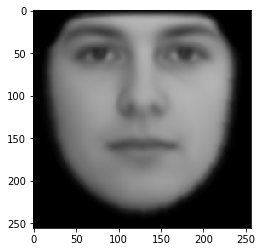

In [9]:
transpose = training.T
sumTuple = transpose.sum(axis=1)
N = 157
meanImg = [x / N for x in sumTuple]
training = training - meanImg
showImage(meanImg)

EIGEN FACES


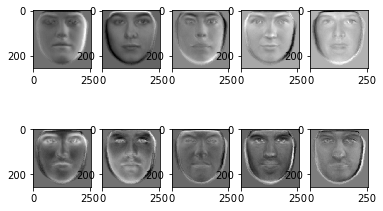

In [10]:
U, s, V = np.linalg.svd(training, full_matrices=False)
eigen_faces=[]
for x in range(V.shape[0]):
    fig=np.reshape(V[x],(-1,256))
    eigen_faces.append(fig)
print("EIGEN FACES")
plot_gallery(eigen_faces, 2, 5)

RECONSTRUCTING FACES FOR K=30


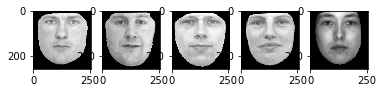

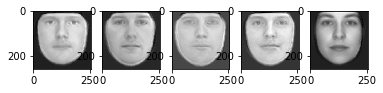

In [11]:
testing = testing - meanImg
k=30
print("RECONSTRUCTING FACES FOR K=30")
reconstructed30 = reconstructing_faces(k,meanImg,testing,V)

plot_gallery(check, 1, 5)
plot_gallery(reconstructed30, 1, 5)

In [56]:
kvals = np.arange(4)
kvals[0] = 10
kvals[1] = 50
kvals[2] = 100
kvals[3] = 150
error1 = np.arange(4)
err = []

Errors for reconstruction in percentage
[24.929919315922724, 29.565734480327546, 31.045727179589356, 30.58402597035898, 24.679070365646716, 25.839396064187568, 28.42651634811332, 27.679063788313435, 27.435862328203484, 36.67004378434582, 33.42971385136976, 33.551198454728755, 26.141783136067374, 33.447123406193036, 28.567967142087948, 31.528232373633646, 28.97805909524499, 26.822242774957537, 30.596458199815014, 28.808222490097947]
RECONSTRUCTING FACES FOR K=10


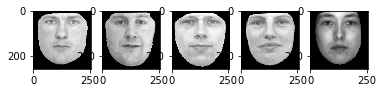

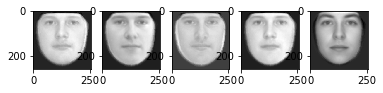

In [57]:
k=10
reconstructed10 = reconstructing_faces(k,meanImg,testing,V)
print("Errors for reconstruction in percentage")
for i in range(len(reconstructed10)):
    error = np.linalg.norm(check[i]-reconstructed10[i])
    k = error/len(training)
    err.append(k)
print(err)
error1[0] = k 
print("RECONSTRUCTING FACES FOR K=10")
plot_gallery(check, 1, 5)
plot_gallery(reconstructed10, 1, 5)

Errors for reconstruction in percentage
[24.929919315922724, 29.565734480327546, 31.045727179589356, 30.58402597035898, 24.679070365646716, 25.839396064187568, 28.42651634811332, 27.679063788313435, 27.435862328203484, 36.67004378434582, 33.42971385136976, 33.551198454728755, 26.141783136067374, 33.447123406193036, 28.567967142087948, 31.528232373633646, 28.97805909524499, 26.822242774957537, 30.596458199815014, 28.808222490097947, 20.27333642761623, 23.64900567522673, 25.596139961780544, 22.184256967267302, 19.4793158060921, 22.45922452962006, 21.303447254822984, 22.009195062231502, 22.162118543048397, 28.654589810589133, 26.5469885725404, 25.882198290082442, 21.623934773522816, 27.121872227803394, 22.57818283576343, 24.194239889614085, 24.46884082677643, 20.152457768450027, 24.367600841194278, 22.105883699506663]
RECONSTRUCTING FACES FOR K=50


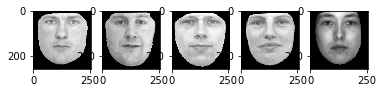

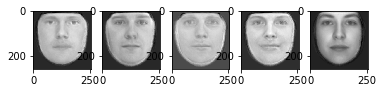

In [58]:
k=50
reconstructed50 = reconstructing_faces(k,meanImg,testing,V)
print("Errors for reconstruction in percentage")
for i in range(len(reconstructed50)):
    error = np.linalg.norm(check[i]-reconstructed50[i])
    k = error/len(training)
    err.append(k)
print(err)
error1[1] = k
print("RECONSTRUCTING FACES FOR K=50")
plot_gallery(check, 1, 5)
plot_gallery(reconstructed50, 1, 5)

Errors for reconstruction in percentage
[24.929919315922724, 29.565734480327546, 31.045727179589356, 30.58402597035898, 24.679070365646716, 25.839396064187568, 28.42651634811332, 27.679063788313435, 27.435862328203484, 36.67004378434582, 33.42971385136976, 33.551198454728755, 26.141783136067374, 33.447123406193036, 28.567967142087948, 31.528232373633646, 28.97805909524499, 26.822242774957537, 30.596458199815014, 28.808222490097947, 20.27333642761623, 23.64900567522673, 25.596139961780544, 22.184256967267302, 19.4793158060921, 22.45922452962006, 21.303447254822984, 22.009195062231502, 22.162118543048397, 28.654589810589133, 26.5469885725404, 25.882198290082442, 21.623934773522816, 27.121872227803394, 22.57818283576343, 24.194239889614085, 24.46884082677643, 20.152457768450027, 24.367600841194278, 22.105883699506663, 18.50308548715978, 20.398578681845123, 22.52592288742836, 19.98831729957922, 17.64016406590536, 20.315041551082615, 18.991874961554306, 19.7338770245349, 20.55180653893154, 

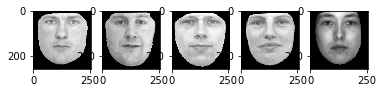

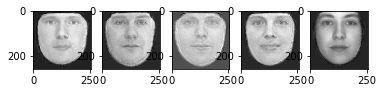

In [59]:
k=100
reconstructed100 = reconstructing_faces(k,meanImg,testing,V)
print("Errors for reconstruction in percentage")
for i in range(len(reconstructed100)):
    error = np.linalg.norm(check[i]-reconstructed100[i])
    k = error/len(training)
    err.append(k)
print(err)
error1[2] = k
np.append(error,k)
print("RECONSTRUCTING FACES FOR K=100")
plot_gallery(check, 1, 5)
plot_gallery(reconstructed100, 1, 5)

Errors for reconstruction in percentage
[24.929919315922724, 29.565734480327546, 31.045727179589356, 30.58402597035898, 24.679070365646716, 25.839396064187568, 28.42651634811332, 27.679063788313435, 27.435862328203484, 36.67004378434582, 33.42971385136976, 33.551198454728755, 26.141783136067374, 33.447123406193036, 28.567967142087948, 31.528232373633646, 28.97805909524499, 26.822242774957537, 30.596458199815014, 28.808222490097947, 20.27333642761623, 23.64900567522673, 25.596139961780544, 22.184256967267302, 19.4793158060921, 22.45922452962006, 21.303447254822984, 22.009195062231502, 22.162118543048397, 28.654589810589133, 26.5469885725404, 25.882198290082442, 21.623934773522816, 27.121872227803394, 22.57818283576343, 24.194239889614085, 24.46884082677643, 20.152457768450027, 24.367600841194278, 22.105883699506663, 18.50308548715978, 20.398578681845123, 22.52592288742836, 19.98831729957922, 17.64016406590536, 20.315041551082615, 18.991874961554306, 19.7338770245349, 20.55180653893154, 

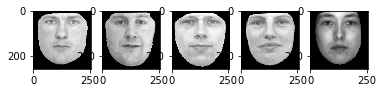

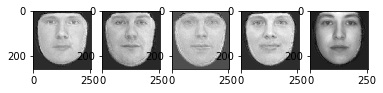

In [60]:
k=150
reconstructed150 = reconstructing_faces(k,meanImg,testing,V)
print("Errors for reconstruction in percentage")
for i in range(len(reconstructed150)):
    error = np.linalg.norm(check[i]-reconstructed150[i])
    k = error/len(training)
    err.append(k)
print(err)
print("RECONSTRUCTING FACES FOR K=150")
error1[3] = k
plot_gallery(check, 1, 5)
plot_gallery(reconstructed150, 1, 5)


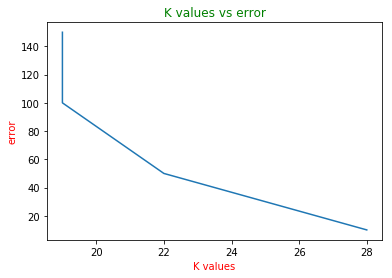

In [53]:
plt.plot(error1,kvals)
plt.xlabel('K values',color='red')
plt.ylabel('error',color='red')
plt.title('K values vs error',color='green')
plt.show()